# Introduction

 Here I'll develop code, and other sundry tasks

# Compare hard and soft updates

### Soft update

/home/kokeeffe/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
(episode, score) = (50, 13.0)
(episode, score) = (100, 155.0)
(episode, score) = (150, 107.0)
(episode, score) = (200, 40.0)
(episode, score) = (250, 200.0)
(episode, score) = (300, 200.0)
(episode, score) = (350, 64.0)
(episode, score) = (400, 109.0)
(episode, score) = (450, 97.0)
(episode, score) = (500, 94.0)


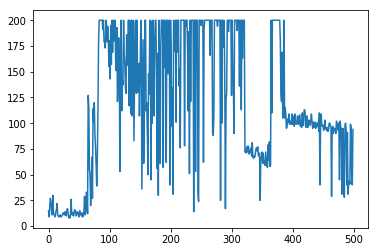

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
#from agent_vanilla import Agent
from agent import Agent
from keras.utils import to_categorical
%matplotlib inline


#Environment
env = gym.make('CartPole-v0')
env.seed(1)  # for comparison
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n

#Agent
lr,gamma = 0.001, 0.95
agent = Agent(num_states, num_actions, lr, gamma)
agent.C = 500  #update the target network every K timestesp
agent.epsilon = 0.5
decay_factor = 0.99
epsilon_min = 0.01
learning_start = 500

#Train
EPISODES = 500
scores = []
step = 0
for e in range(1,EPISODES+1):
    state = env.reset()
    reward_sum = 0
    done = False
    while not done:
        
        #Take step
        state = np.reshape(state, [1, num_states])  #reshape for keras
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward_sum += reward
        agent.remember(state[0], action, reward, next_state, done)
        state = next_state
        
        #Learn
        if len(agent.memory) > learning_start:
            agent.replay()                       #update the behavior network
            agent.soft_update_target_network()   #update the target network

        #iterate
        step += 1
        if done:
            break
    
    #Learn & print results
    scores.append(reward_sum)
    agent.epsilon = max(agent.epsilon*decay_factor,epsilon_min)
    if e % 50 == 0:
        print '(episode, score) = ' + str((e,reward_sum))

plt.plot(scores)
#np.savetxt('stats/scores_cartpole.txt',scores)

### Hard update

WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
(episode, score) = (50, 10.0)
(episode, score) = (100, 10.0)
(episode, score) = (150, 8.0)
(episode, score) = (200, 200.0)
(episode, score) = (250, 200.0)
(episode, score) = (300, 74.0)
(episode, score) = (350, 89.0)
(episode, score) = (400, 69.0)
(episode, score) = (450, 91.0)
(episode, score) = (500, 33.0)


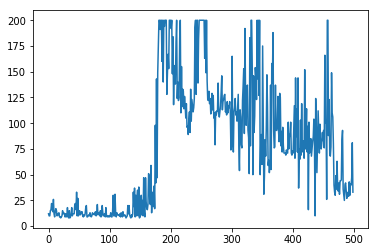

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import gym
#from agent_vanilla import Agent
from agent import Agent
from keras.utils import to_categorical
%matplotlib inline


#Environment
env = gym.make('CartPole-v0')
env.seed(1)  # for comparison
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n

#Agent
lr,gamma = 0.001, 0.95
agent = Agent(num_states, num_actions, lr, gamma)
agent.C = 500  #update the target network every K timestesp
agent.epsilon = 0.5
decay_factor = 0.99
epsilon_min = 0.01
learning_start = 500

#Train
EPISODES = 500
scores = []
step = 0
for e in range(1,EPISODES+1):
    state = env.reset()
    reward_sum = 0
    done = False
    while not done:
        
        #Take step
        state = np.reshape(state, [1, num_states])  #reshape for keras
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward_sum += reward
        agent.remember(state[0], action, reward, next_state, done)
        state = next_state
        
        #Learn
        if len(agent.memory) > learning_start:
            agent.replay()                       #update the behavior network
            agent.hard_update_target_network(step)   #update the target network

        #iterate
        step += 1
        if done:
            break
    
    #Learn & print results
    scores.append(reward_sum)
    agent.epsilon = max(agent.epsilon*decay_factor,epsilon_min)
    if e % 50 == 0:
        print '(episode, score) = ' + str((e,reward_sum))

plt.plot(scores)
#np.savetxt('stats/scores_cartpole.txt',scores)